# Activity 6 - Visualisation

Here we show a variety of different Python visualisation methods.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Scatter Plot

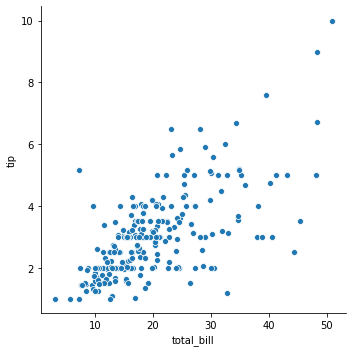

In [2]:
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", data=tips);

# Line Plot

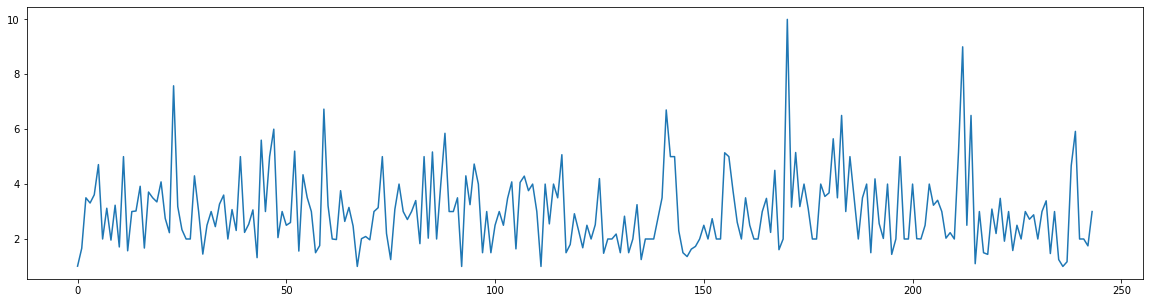

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(tips['tip'])

# Bar Chart

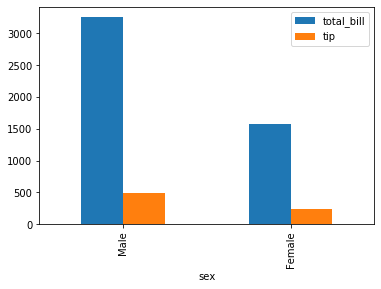

In [4]:
tips[['total_bill','tip', 'sex']].groupby('sex').sum().plot.bar()

# 3D Visualisation

<IPython.core.display.Javascript object>


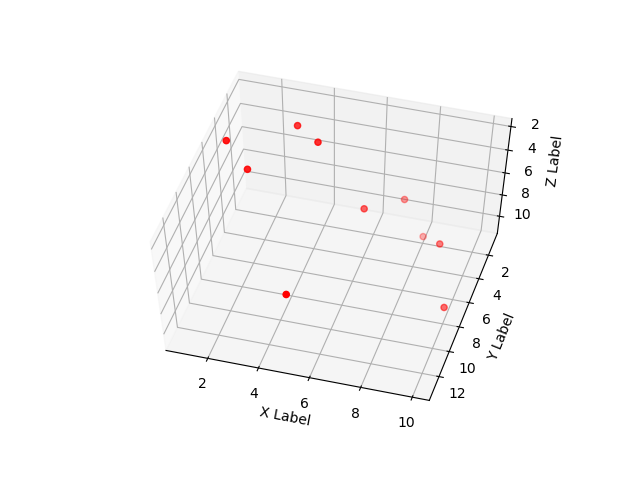

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Use this if working in Jupyter Notebook rather than JupyterLab
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =[1,2,3,4,5,6,7,8,9,10]
y =[5,6,2,3,13,4,1,2,4,8]
z =[2,3,3,3,5,7,9,11,9,10]

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

***Note:*** Our 3D plot is not actually interactive in JupyterLab - this is a known issue in JupyterLab. You can use either Jupyter Notebook or you can run as a standalone Python script - I've included the scripts in the following cells - you can copy/paste to standalone Python .py files if preferred or run via Jupyter Notebook.

<IPython.core.display.Javascript object>


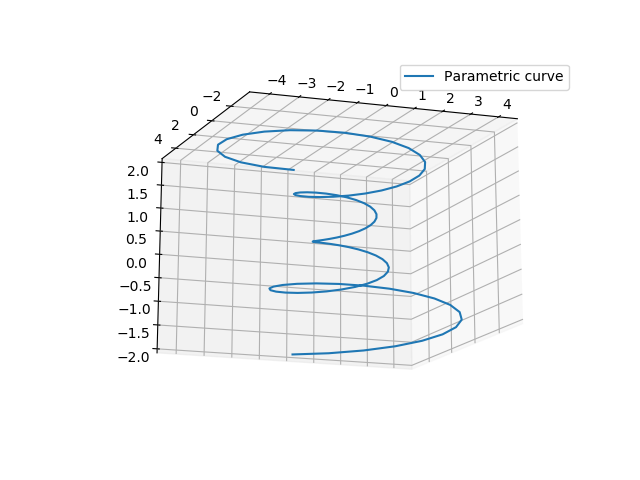

In [4]:
## 3D Line Plot

'''
==============
3D lineplot
==============
Demonstration of a basic lineplot in 3D.
'''

# Import libraries
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

# Set the legend font size to 10
mpl.rcParams['legend.fontsize'] = 10

# Create figure object
fig = plt.figure()

# Get the current axes, creating one if necessary.
ax = fig.gca(projection='3d')

# Create data point to plot
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)

# Plot line graph 
ax.plot(x, y, z, label='Parametric curve')

# Set default legend
ax.legend()

plt.show()

<IPython.core.display.Javascript object>


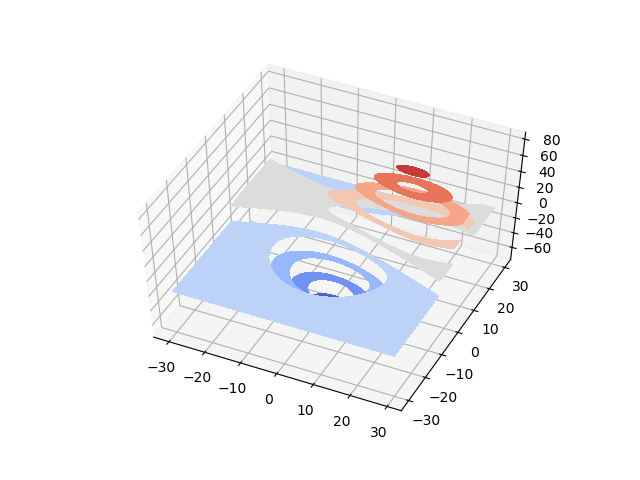

In [5]:
## 3D Contour Plot

'''
==============
Contour Plots
==============
Plot a contour plot that shows intensity
'''
# Import libraries
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

# Create figure object
fig = plt.figure()

# Get the current axes, creating one if necessary.
ax = fig.gca(projection='3d')

# Get test data
X, Y, Z = axes3d.get_test_data(0.05)

# Plot contour curves
cset = ax.contourf(X, Y, Z, cmap=cm.coolwarm)

# Set labels
ax.clabel(cset, fontsize=9, inline=1)

plt.show()

<IPython.core.display.Javascript object>


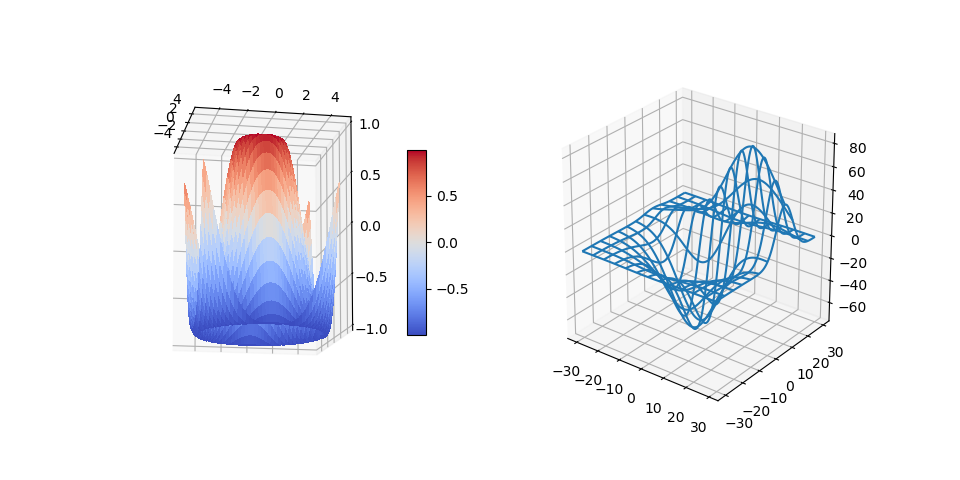

In [6]:
## 3D Surface Plot

'''
====================
3D plots as subplots
====================
Demonstrate including 3D plots as subplots.
'''

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
from matplotlib import cm
import numpy as np


# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

#===============
#  First subplot
#===============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

# plot a 3D surface like in the example mplot3d/surface3d_demo
# Get equally spaced numbers with interval of 0.25 from -5 to 5
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
# Convert it into meshgrid for plotting purpose using x and y
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)
fig.colorbar(surf, shrink=0.5, aspect=10)

#===============
# Second subplot
#===============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
# Return a tuple X, Y, Z with a test data set
X, Y, Z = get_test_data(0.05)
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()

## Node-Link Diagram

Here we show a Node Link diagram that uses the NetworkX Python library (Note this is not interactive, and so not force-directed).

A Javascript-based Force Directed layout is available to try at: https://observablehq.com/@d3/force-directed-graph

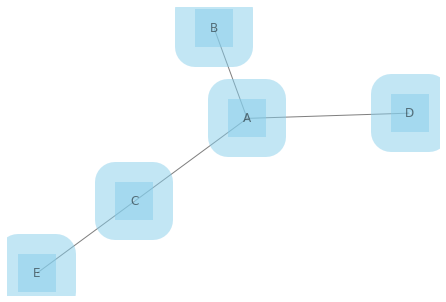

In [10]:
# !pip install networkx

%matplotlib inline

# libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
 
# Build a dataframe with your connections
df = pd.DataFrame({ 'from':['A', 'B', 'C','A'], 'to':['D', 'A', 'E','C']})
df
 
# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to')
 
# Graph with Custom nodes:
nx.draw(G, with_labels=True, node_size=1500, node_color="skyblue", node_shape="s", alpha=0.5, linewidths=40)
plt.show()


## Parallel Coordinates

Here we show a simple parallel coordinates using Pandas. As above, this is not interactive and so does not support brushing or reordering.

A Javascript D3 parallel coordinates is available here: https://bl.ocks.org/jasondavies/1341281

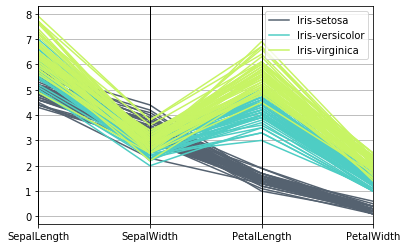

In [11]:
df = pd.read_csv('https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/iris.csv')
pd.plotting.parallel_coordinates(df, 'Name', color=('#556270', '#4ECDC4', '#C7F464'))

## Treemaps (using Plotly - yet another Python Visualisation library!)

Here are two examples for creating treemaps and sunburst visualisations. These are not available in Seaborn, Matplotlib or Pandas as default, however we can use Plotly - another open source visualisation library. Plotly is open-source and supports a bunch of extra features - including the development of full HTML Dashboards in Python without the need for Javascript. Here we generate our plots to a new HTML file (primarily because JupyterLab notebook support is variable - check the docs for details).

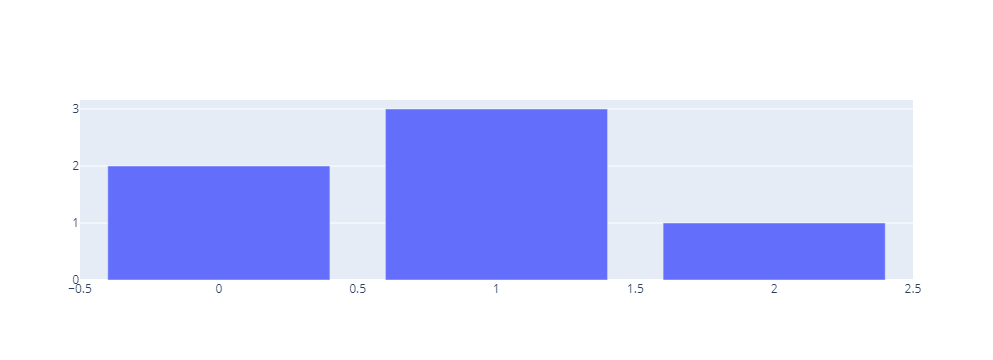

In [13]:
# https://plotly.com/python/getting-started/#installation

import plotly.graph_objects as go
fig = go.Figure(data=go.Bar(y=[2, 3, 1]))
#fig.write_html('first_figure.html', auto_open=True)
#fig.show() #- works in Notebook but not in Lab

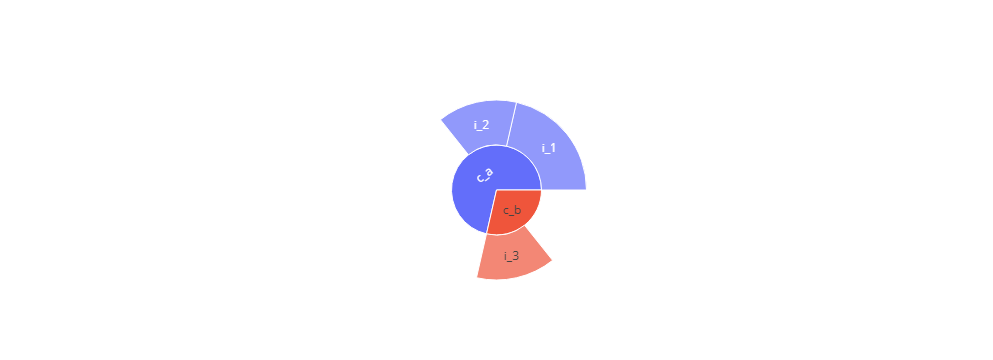

In [14]:
import plotly.graph_objects as go

fig =go.Figure(go.Sunburst(
    labels= ["MyWork.txt", "Holiday.jpg", "Documents", "FavouriteSong.mp3", "Desktop"],
    parents= ["Documents", "Documents", "", "Desktop", ""], 
    values= [3, 2, 5, 2, 2],
))

#fig.write_html('first_figure.html', auto_open=True)
fig.show() #- works in Notebook but not in Lab

More on Pandas Visualisation available in the documentation

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html